# Intro to PyTorch

<figure style='float:right;max-width:30%;'>
<img src='https://upload.wikimedia.org/wikipedia/commons/thumb/c/c6/PyTorch_logo_black.svg/640px-PyTorch_logo_black.svg.png' style='padding:10px;background-color:white'>
<figcaption style='text-align:right'>Source: <a href=https://commons.wikimedia.org/wiki/File:PyTorch_logo_black.svg>Wikimedia Commons</a></figcaption>
</figure>

PyTorch is a machine learning framework with a major focus on neural networks used for computer vision, audio and natural language processing. The user-facing frontend is written in Python, but the number-crunching is handled by a more optimized C++ backend, including support for outsourcing computations to graphics cards (GPUs) for a substantial increase in speed. PyTorch was originally created by Meta (formerly known as facebook), but has always been open source, permissively licensed ([BSD-3](https://en.wikipedia.org/wiki/BSD_licenses#3-clause)), and since September 2022 is managed by the non-profit PyTorch Foundation, a subsidiary of the [Linux Foundation](https://en.wikipedia.org/wiki/Linux_Foundation).

The accessible interface, huge community, and optimized implementations have established PyTorch among the top choices for education, research, and production in the field of neural network design.

<div class="alert alert-block alert-info"> 

<b>Caveat emptor:</b> PyTorch is not really "better" or "worse" than other popular frameworks like [Keras](https://keras.io/) or [TensorFlow](https://www.tensorflow.org/). While each framework has its particular strengths, they differ more in their style, philosophy, and user base than in their feature lists and performance. You should absolutely explore other options available to you and find what you like best!
</div>



## 0. Prerequisites

This notebook is directed at an audience with a fundamental understanding of neural networks. If you are completely new to this field, you might want to check out the following articles:

- [A Gentle Introduction to Neural Networks](https://towardsdatascience.com/a-gentle-introduction-to-neural-networks-series-part-1-2b90b87795bc)
- [Build Neural Network from Scratch](https://towardsdatascience.com/build-neural-network-from-scratch-part-2-673ec7cdd89f)
- [Machine Learning for Beginners: An Introduction to Neural Networks](https://towardsdatascience.com/machine-learning-for-beginners-an-introduction-to-neural-networks-d49f22d238f9)

A good command of the Python programming language is also required to fully understand the code presented in this notebook. If you have no experience with Python, there are innumerable great tutorials and introductions out there. You can find a good overview of some of them [here](https://wiki.python.org/moin/BeginnersGuide/Programmers).

## 1. Structure

The core package of PyTorch is called [`torch`](https://pypi.org/project/torch/). This package contains all the code required to setup and compute general purpose neural networks. It is extended by packages that offer more specialized functions and objects specific to various applications: [`torchvision`](https://pytorch.org/vision/stable/index.html) for Computer Vision (working with images or videos), [`torchaudio`](https://pytorch.org/audio/stable/index.html) for audio processing (e.g. speech recognition or synthesis), and [`torchtext`](https://pytorch.org/text/stable/index.html) for natural language processing. PyTorch is extended by various other packages that comprise the [*PyTorch Ecosystem*](https://pytorch.org/ecosystem/).

## 2. Core components

A plethora of functions and objects can be found within PyTorch. But arguably the most important basic components are:

1. The [`Tensor`](https://pytorch.org/docs/stable/tensors.html#tensor-class-reference) class
2. The differentiation engine [`Autograd`](https://pytorch.org/docs/stable/autograd.html#module-torch.autograd)
3. The neural network building blocks (layers and activation functions) found in [`torch.nn`](https://pytorch.org/docs/stable/nn.html#module-torch.nn)

Before we build our first neural network from scratch, let us walk through these components one at a time:

### 2.1 The `Tensor` class

<figure style='float:right;max-width=10%;'>
<img src=https://imgs.xkcd.com/comics/machine_learning.png style='padding-right:10px'>
<figcaption>Source: <a href=https://xkcd.com/license.html>XKCD</a> </figcaption>
</figure>

Neural networks are essentially a sequence of linear algebra operations. A [mathematical tensor](https://en.wikipedia.org/wiki/Tensor) is the most general algebraic object, of which simpler algebraic objects can be derived:

- A scalar is a tensor of rank 0:
$$
\left[ 0 \right]
$$
- A vector is a tensor of rank 1 (a.k.a. a collection of rank 0 tensors):
$$
\begin{bmatrix} \left[ 0 \right], \left[ 1 \right], \left[ 2 \right] \end{bmatrix}
$$
- A matrix is a tensor of rank 2 (a.k.a. a collection of rank 1 tensors):
$$
\begin{bmatrix} 
  \begin{bmatrix} \left[ 0 \right], \left[ 1 \right], \left[ 2 \right] \end{bmatrix} \\
  \begin{bmatrix} \left[ 3 \right], \left[ 4 \right], \left[ 5 \right] \end{bmatrix} \\
  \begin{bmatrix} \left[ 6 \right], \left[ 7 \right], \left[ 8 \right] \end{bmatrix} 
\end{bmatrix}
$$
- An $n$-dimensional array is a tensor of rank $n$ (a.k.a. a collection of rank $n-1$ tensors):
$$
\begin{bmatrix}
\begin{bmatrix} 
  \begin{bmatrix} \left[ 0 \right], \left[ 1 \right], \left[ 2 \right] \end{bmatrix} \\
  \begin{bmatrix} \left[ 3 \right], \left[ 4 \right], \left[ 5 \right] \end{bmatrix} \\
  \begin{bmatrix} \left[ 6 \right], \left[ 7 \right], \left[ 8 \right] \end{bmatrix} 
\end{bmatrix}, 
\begin{bmatrix} 
  \begin{bmatrix} \left[ 9 \right], \left[ 10 \right], \left[ 11 \right] \end{bmatrix} \\
  \begin{bmatrix} \left[ 12 \right], \left[ 13 \right], \left[ 14 \right] \end{bmatrix} \\
  \begin{bmatrix} \left[ 15 \right], \left[ 16 \right], \left[ 17 \right] \end{bmatrix} 
\end{bmatrix}, 
\ldots
\end{bmatrix}
$$

**Note:** Describing a mathematical tensor as a generalized matrix is not [the whole story](https://medium.com/@quantumsteinke/whats-the-difference-between-a-matrix-and-a-tensor-4505fbdc576c). For the purposes of this introduction, this simplified definition shall, however, suffice.

In PyTorch, everything runs on tensors: Your data is encoded in a tensor, the neural networks are expressed as tensors, sending the data through the network is a series of transformations on a tensor. All of these tensors are represented by a class named [`Tensor`](https://pytorch.org/docs/stable/tensors.html#torch-tensor) found in the core `torch` module. 

In [2]:
import torch

torch.Tensor([[0, 1, 2], [3, 4, 5]])

tensor([[0., 1., 2.],
        [3., 4., 5.]])

#### 2.1.1 Creating a `Tensor`

There are [many ways to conveniently create tensors](https://pytorch.org/docs/stable/torch.html#creation-ops) from existing data, with specific initializations, or of specific shapes. Let's try out some examples:

In [3]:
print("A rank 3 tensor filled with zeros: \n", zeros := torch.zeros(2, 2, 2))
print("A tensor of the same shape but filled with ones: \n", torch.ones_like(zeros))
print("A rank 2 tensor representing an identity matrix:\n", torch.eye(4))

A rank 3 tensor filled with zeros: 
 tensor([[[0., 0.],
         [0., 0.]],

        [[0., 0.],
         [0., 0.]]])
A tensor of the same shape but filled with ones: 
 tensor([[[1., 1.],
         [1., 1.]],

        [[1., 1.],
         [1., 1.]]])
A rank 2 tensor representing an identity matrix:
 tensor([[1., 0., 0., 0.],
        [0., 1., 0., 0.],
        [0., 0., 1., 0.],
        [0., 0., 0., 1.]])


#### 2.1.2 Indexing, slicing, operations


As the central data structure in `PyTorch`, `Tensor` objects support all features of a normal multi-dimensional array. You can access individual elements in a `Tensor` by using Python's or `numpy`'s regular indexing and slicing notation:

In [4]:
t = torch.tensor([[11, 12, 13], [21, 22, 23], [31, 32, 33]])
print(t)
print("Python-style indexing:", t[1][2])
print("Numpy-style indexing:", t[0, 1])
print("Python-style slicing (first row):", t[0][:])
print("Numpy-style slicing (last column):", t[:, -1])

tensor([[11, 12, 13],
        [21, 22, 23],
        [31, 32, 33]])
Python-style indexing: tensor(23)
Numpy-style indexing: tensor(12)
Python-style slicing (first row): tensor([11, 12, 13])
Numpy-style slicing (last column): tensor([13, 23, 33])


We can perform basic calculations with tensors just as we would expect:

In [5]:
a = torch.tensor([1, 1, 1])
b = torch.tensor([2, 2, 2])

print(f'{a = }, {b = }')
print(f'Addition: {a + b = }')
print(f'Element-wise product: {a * b = }')
print(f'Element-wise division: {a / b = }')
print(f"Matrix multiplicaiton: {a @ b = }")

a = tensor([1, 1, 1]), b = tensor([2, 2, 2])
Addition: a + b = tensor([3, 3, 3])
Element-wise product: a * b = tensor([2, 2, 2])
Element-wise division: a / b = tensor([0.5000, 0.5000, 0.5000])
Matrix multiplicaiton: a @ b = tensor(6)


In addition to basic operations, a number of methods and functions are provided to mirror the functionality offered by `numpy`:

In [6]:
print(t)
print("Find the maximum value in the tensor:", t.max())
print("Find the minimum value in the tensor:", t.min())
print("Calculate the sum along the first dimension:", t.sum(dim=0))
print("Calculate the sine of each element: ", t.sin())

tensor([[11, 12, 13],
        [21, 22, 23],
        [31, 32, 33]])
Find the maximum value in the tensor: tensor(33)
Find the minimum value in the tensor: tensor(11)
Calculate the sum along the first dimension: tensor([63, 66, 69])
Calculate the sine of each element:  tensor([[-1.0000, -0.5366,  0.4202],
        [ 0.8367, -0.0089, -0.8462],
        [-0.4040,  0.5514,  0.9999]])


What makes `Tensor`s special, however, is the added functionality specifically designed for machine learning workflows.

We can, for example, move a tensor to the computer's GPU. 

<div class="alert alert-block alert-info"> 
<b>Note:</b> If you tried to do anything GPU-related on a computer without GPU-access, your program would fail ungracefully. But you should always keep portability in mind: Machine-learning code is often developed and tested on a local machine (e.g. a laptop) and then moved to a cluster or other high-performance computer to do the actual number crunching. 
</div>

There is, however, a way to make sure we only use a device that is actually available on the current machine:

In [7]:
if torch.cuda.is_available():  # CUDA is usually the most desirable backend
    backend = 'cuda'
else:
    backend = 'cpu'

device = torch.device(backend)
print(f'Using {backend.upper()} backend!')

Using CPU backend!


Now we can safely move a tensor to a different device:

In [8]:
t = t.to(device)
t.device

device(type='cpu')

Now all subsequent operations involving the `Tensor` are going to run on the GPU (if available)!

Another major benefit of using `Tensor`s over regular `numpy` arrays is the automatic calculation of gradients, which we will learn more about in the next section. 

### 2.2 The `Autograd` differentiation engine

<div class="alert alert-block alert-info"> 

This section is in large parts taken from the [`PyTorch` tutorial "The Fundamentals of Autograd"](https://pytorch.org/tutorials/beginner/introyt/autogradyt_tutorial.html#what-do-we-need-autograd-for)!
</div>


#### 2.2.1 Gradients in neural network training
Calculating gradients is *the* most important computation when training neural networks. If you would like a quick reminder why, read on. Otherwise, you can skip ahead to the [TL;DR](https://en.wikipedia.org/wiki/TL;DR) at the end of this section, or even straight to next section.

A machine learning model is a function, with inputs and outputs. For this discussion, we’ll treat the inputs as an i-dimensional vector $\vec{x}$, with elements $x_{i}$. We can then express the model, $M$, as a vector-valued function of the input: 
$$
\vec{y} = \vec{M}\left(\vec{x}\right) 
$$
(We treat the value of $M$’s output as a vector because in general, a model may have any number of outputs.)

Since we’ll mostly be discussing autograd in the context of training, our output of interest will be the model’s loss. The loss function 
$$
L\left(\vec{y}\right) = L\left(\vec{M}\right)
$$ 

is a single-valued scalar function of the model’s output. This function expresses how far off our model’s prediction was from a particular input’s ideal output. *Note:* After this point, we will often omit the vector sign where it should be contextually clear - e.g., $y$ instead of $\vec{y}$.

In training a model, we want to minimize the loss. In the idealized case of a perfect model, that means adjusting its learning weights - that is, the adjustable parameters of the function - such that loss is zero for all inputs. In the real world, it means an iterative process of nudging the learning weights until we see that we get a tolerable loss for a wide variety of inputs.

How do we decide how far and in which direction to nudge the weights? We want to minimize the loss, which means making its first derivative with respect to the input equal to 0: 

$$
\frac{\partial L}{\partial x} = 0 
$$

Recall, though, that the loss is not directly derived from the input, but a function of the model’s output (which is a function of the input directly):

$$
\frac{\partial L}{\partial x}  = \frac{\partial {L({\vec y})}}{\partial x} 
$$

By the chain rule of differential calculus, we have 

$$
\frac{\partial {L({\vec y})}}{\partial x} = \frac{\partial L}{\partial y}\frac{\partial y}{\partial x}  = \frac{\partial L}{\partial y}\frac{\partial M(x)}{\partial x}.$$

$\frac{\partial M(x)}{\partial x}$ is where things get complex. The partial derivatives of the model’s outputs with respect to its inputs, if we were to expand the expression using the chain rule again, would involve many local partial derivatives over every multiplied learning weight, every activation function, and every other mathematical transformation in the model. The full expression for each such partial derivative is the sum of the products of the local gradient of every possible path through the computation graph that ends with the variable whose gradient we are trying to measure.

In particular, the gradients over the learning weights are of interest to us - they tell us what direction to change each weight to get the loss function closer to zero.

Since the number of such local derivatives (each corresponding to a separate path through the model’s computation graph) will tend to go up exponentially with the depth of a neural network, so does the complexity in computing them. 

<div class="alert alert-block alert-info"> 

**TL;DR:**
Training a neural network means adjusting its parameters so that its output is "as correct as possible". The gradient of the error tells us how a change of the parameters affects the correctness of the output and is therefore *the* essential driver of the training process. Calculating gradients with respect to every single parameter, however, is complex and resource-intensive.
</div>

#### 2.2.2 `Autograd` to the rescue

This is where `Autograd` comes in: It tracks the history of every computation performed on a tensor. Every computed tensor in your `PyTorch` model carries a history of its input tensors and the function used to create it. Combined with the fact that `PyTorch` functions meant to act on tensors each have a built-in implementation for computing their own derivatives, this greatly speeds up the computation of the local derivatives needed for learning.

Let's look at a simple example: We will create a set of equidistant values between $0$ and $2\pi$ and then apply a few functions to it. Afterwards we will walk *backwards* through the sequence of calculations and differentiate every step long the way.

First up, we create a tensor of 25 linearly spaced values on the interval $[0, 2\pi]$. By default, `Autograd` will not track the gradient of tensors created in this way. We have to set `requires_grad` explicitly to `True`!

In [9]:
import math

a = torch.linspace(0., 2. * math.pi, steps=25, requires_grad=True)
a

tensor([0.0000, 0.2618, 0.5236, 0.7854, 1.0472, 1.3090, 1.5708, 1.8326, 2.0944,
        2.3562, 2.6180, 2.8798, 3.1416, 3.4034, 3.6652, 3.9270, 4.1888, 4.4506,
        4.7124, 4.9742, 5.2360, 5.4978, 5.7596, 6.0214, 6.2832],
       requires_grad=True)

We can now do a calculation on it:

In [10]:
b = torch.sin(a)
b

tensor([ 0.0000e+00,  2.5882e-01,  5.0000e-01,  7.0711e-01,  8.6603e-01,
         9.6593e-01,  1.0000e+00,  9.6593e-01,  8.6603e-01,  7.0711e-01,
         5.0000e-01,  2.5882e-01, -8.7423e-08, -2.5882e-01, -5.0000e-01,
        -7.0711e-01, -8.6603e-01, -9.6593e-01, -1.0000e+00, -9.6593e-01,
        -8.6603e-01, -7.0711e-01, -5.0000e-01, -2.5882e-01,  1.7485e-07],
       grad_fn=<SinBackward0>)

Notice that the result tensor `b` has a property called `grad_fn` that tells us that it is the result of a `sin` operation!

Let's do some more computations:

In [11]:
c = 2 * b
print(c)
d = c + 1
print(d)

tensor([ 0.0000e+00,  5.1764e-01,  1.0000e+00,  1.4142e+00,  1.7321e+00,
         1.9319e+00,  2.0000e+00,  1.9319e+00,  1.7321e+00,  1.4142e+00,
         1.0000e+00,  5.1764e-01, -1.7485e-07, -5.1764e-01, -1.0000e+00,
        -1.4142e+00, -1.7321e+00, -1.9319e+00, -2.0000e+00, -1.9319e+00,
        -1.7321e+00, -1.4142e+00, -1.0000e+00, -5.1764e-01,  3.4969e-07],
       grad_fn=<MulBackward0>)
tensor([ 1.0000e+00,  1.5176e+00,  2.0000e+00,  2.4142e+00,  2.7321e+00,
         2.9319e+00,  3.0000e+00,  2.9319e+00,  2.7321e+00,  2.4142e+00,
         2.0000e+00,  1.5176e+00,  1.0000e+00,  4.8236e-01, -3.5763e-07,
        -4.1421e-01, -7.3205e-01, -9.3185e-01, -1.0000e+00, -9.3185e-01,
        -7.3205e-01, -4.1421e-01,  4.7684e-07,  4.8236e-01,  1.0000e+00],
       grad_fn=<AddBackward0>)


Finally, let’s compute a single-element output, as is the case when computing a loss function.

In [12]:
out = d.sum()
out

tensor(25., grad_fn=<SumBackward0>)

Each `grad_fn` stored with our tensors allows you to walk the computation all the way back to its inputs with its `next_functions` property. We can drill down on this property to show us the gradient functions for all the prior tensors. 

In [13]:
print('out:')
print(out.grad_fn)
print(out.grad_fn.next_functions)
print(out.grad_fn.next_functions[0][0].next_functions)
print(out.grad_fn.next_functions[0][0].next_functions[0][0].next_functions)
print(out.grad_fn.next_functions[0][0].next_functions[0][0].next_functions[0][0].next_functions)
print(out.grad_fn.next_functions[0][0].next_functions[0][0].next_functions[0][0].next_functions[0][0].next_functions)
print('\nd:')
print(d.grad_fn)
print(d.grad_fn.next_functions)
print(d.grad_fn.next_functions[0][0].next_functions)
print(d.grad_fn.next_functions[0][0].next_functions[0][0].next_functions)
print(d.grad_fn.next_functions[0][0].next_functions[0][0].next_functions[0][0].next_functions)
print('\nc:')
print(c.grad_fn)
print('\nb:')
print(b.grad_fn)
print('\na:')
print(a.grad_fn)

out:
((<AddBackward0 object at 0x140c8bb80>, 0),)
((<MulBackward0 object at 0x140c8bbb0>, 0), (None, 0))
((<SinBackward0 object at 0x140c8bb20>, 0), (None, 0))
((<AccumulateGrad object at 0x140c8bbb0>, 0),)
()

d:
((<MulBackward0 object at 0x140c8ba90>, 0), (None, 0))
((<SinBackward0 object at 0x140c8bb20>, 0), (None, 0))
((<AccumulateGrad object at 0x140c8bac0>, 0),)
()

c:

b:

a:
None


Note that `a.grad_fn` is reported as `None`, indicating that this was an input to the function with no history of its own.

With all this machinery in place, how do we get derivatives out? You call the `backward()` method on the output, and check the input’s `grad` property to inspect the gradients:

In [14]:
out.backward()
print(a.grad)

tensor([ 2.0000e+00,  1.9319e+00,  1.7321e+00,  1.4142e+00,  1.0000e+00,
         5.1764e-01, -8.7423e-08, -5.1764e-01, -1.0000e+00, -1.4142e+00,
        -1.7321e+00, -1.9319e+00, -2.0000e+00, -1.9319e+00, -1.7321e+00,
        -1.4142e+00, -1.0000e+00, -5.1764e-01,  2.3850e-08,  5.1764e-01,
         1.0000e+00,  1.4142e+00,  1.7321e+00,  1.9319e+00,  2.0000e+00])


We will visualize this in a second, but let's try to figure out what we *should* see here. Recall that the computations we did were the following:

$$
d = 2 \cdot \sin\left(a\right) + 1
$$

So the derivative with respect to $a$ should be:

$$
\frac{\partial d}{\partial a} = 2\cdot \cos\left(a\right)
$$

Let's check this by visualizing our result:

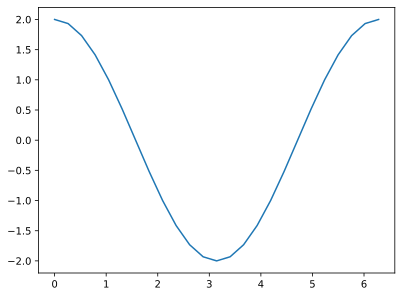

In [15]:
import matplotlib.pyplot as plt

# We need to call the method detach() to signal that the gradients should not be tracked from this point on
plt.plot(a.detach(), a.grad.detach())

🎉 Success! 👏

We will see more of `Autograd` in action later, but first we need to talk about how to build neural networks in `PyTorch`.

### 2.3 Building blocks for neural networks


<figure style='float:right;width:30%'>

<img src="https://pytorch.org/assets/images/densenet1.png">
<figcaption>

The many layers of [DenseNet](https://pytorch.org/hub/pytorch_vision_densenet/)
</figcaption>
</figure>

Neural networks are made up of a sequence of layers. Unsurprisingly, `PyTorch` offers a great variety of layers as building blocks to string together any desired architecture. They can be found alongside various activation functions in the submodule [`torch.nn`](https://pytorch.org/docs/stable/nn.html).

You can find descriptions of each layer [in the documentation](https://pytorch.org/docs/stable/nn.html#module-torch.nn), but let's quickly mention some of the basic layers together:

- [`torch.nn.Linear`](https://pytorch.org/docs/stable/generated/torch.nn.Linear.html#torch.nn.Linear): A linear transformation of the incoming data:
  $$ y = xA^\mathrm{T} + b$$
- [`torch.nn.Conv2d`](https://pytorch.org/docs/stable/generated/torch.nn.Conv2d.html#conv2d): A 2D convolution over the incoming data
- [`torch.nn.LSTM`](https://pytorch.org/docs/stable/generated/torch.nn.LSTM.html#lstm): Applies a long short-term memory RNN to the input data
- [`torch.nn.Dropout`](https://pytorch.org/docs/stable/generated/torch.nn.Dropout.html#dropout): A dropout layer to randomly zero some of the input values during training

The number of available layer types constantly increases as new architectures are developed in the field. In addition to these, `torch.nn` contains a number of containers to facilitate composing multiple layers into a neural network, which we will do in the next section.

## 3. A neural network from scratch

Let's design a neural network to classify flowers from the [Iris dataset](https://archive.ics.uci.edu/ml/datasets/iris)! 

We can read the data from the provided CSV file and split it into train and test set using [`pandas`](https://pandas.pydata.org/):

In [16]:
import pandas as pd

dataset = pd.read_csv('data/iris.csv')
# Encode species
class_names = dataset['class'].unique()
dataset['class'] = dataset['class'].map({name: idx for idx, name in enumerate(class_names)})

# Split data randomly into training (90 %) and test (10 %) sets
training_data = dataset.sample(frac=0.9)
test_data = dataset.drop(training_data.index)

Since the native data structure in `PyTorch` is the `Tensor` and its default data types are long integers and single-precision floats, we now convert all objects into `Tensor` of type `torch.long` or `torch.float32`:

In [17]:
# Convert the data into tensors
training_labels = torch.tensor(training_data['class'].values, dtype=torch.long)
training_data = torch.tensor(training_data.drop(columns='class').values, dtype=torch.float32)

test_labels = torch.tensor(test_data['class'].values, dtype=torch.long)
test_data = torch.tensor(test_data.drop(columns='class').values, dtype=torch.float32)

Now that we have some data, we can start designing a neural network for it. Identifying the optimal architecture for this problem is beyond the scope of this notebook. Our focus here is on understanding the building blocks of our neural network and its implementation. We could therefore try something like this:

<img src="img/iris_network.svg" style="background-color:white;padding:1em">

All neural networks (and, as a matter of fact, also all layers) are derived from the container `Module` found in `torch.nn`. We define the architecture in the subclass' `__init__` method. We also need to implement the `forward` method to define how our network is processing input data:

In [18]:
import torch.nn as nn

class MyNeuralNetwork(nn.Module):
    def __init__(self, input_length, hidden_layer_size, n_classes):
        # Initialize the superclass first
        super(MyNeuralNetwork, self).__init__()
        
        """ Now we can define the network's structure """
        # The network consists of a single, linear hidden layer...
        self.hidden_layer = nn.Linear(input_length, hidden_layer_size)
        # ...and an output layer
        self.output_layer = nn.Linear(hidden_layer_size, n_classes)

    def forward(self, x):
        """ Here we define the networks behavior as inputs are passed through it """
        # The output of the hidden layer is passed through a tanh activation function
        hidden_layer_activation = torch.tanh(self.hidden_layer(x))
        logits = self.output_layer(hidden_layer_activation)
        return logits

Now that we have defined our network architecture, we can instantiate it by specifying the hidden layer size and the number of output classes:

In [19]:
n_features = training_data.shape[1]
n_species = len(training_labels.unique())
net = MyNeuralNetwork(input_length=n_features, hidden_layer_size=8, n_classes=n_species)

And there it is, our first neural network in PyTorch! 🎉

In [20]:
net

MyNeuralNetwork(
  (hidden_layer): Linear(in_features=4, out_features=8, bias=True)
  (output_layer): Linear(in_features=8, out_features=3, bias=True)
)

As it stands, the network is not very useful, of course. We need to train it on our dataset so that it can learn patterns in the data. Training a neural network is a high-dimensional optimization problem that seeks to minimize the deviation of the predicted classes from the actual classes. This deviation is expressed by a loss function. Many loss functions have been developed and successfully applied in the field, and PyTorch offers a wide range of loss functions to choose from in [`torch.nn`](https://pytorch.org/docs/stable/nn.html#loss-functions). The choice of the loss function is a design decision that should be carefully weighed. In this example, we will go with the cross entropy loss, which has been shown to work well with multi-class classification problems.

In [ ]:
criterion = nn.CrossEntropyLoss()  # Works well in this example, but there are many more options!

The other important component in training is the choice of optimizer. The optimizer is essentially a strategy that determines how we update the weights and biases in our network based on a given loss. A number of optimization algorithms are implemented in the module [`torch.optim`](https://pytorch.org/docs/stable/optim.html#algorithms). Here, we will go with the popular stochastic gradient descent (SGD) algorithm.

In [ ]:
import torch.optim as optim
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)  # Once again, there are many more options available!

Note that we pass the parameters of our network to the optimizer here as a reference! This is how the network and the optimizer are connected: the optimizer can directly affect the networks parameters.

The training process consists of an outer loop over the epochs (complete passes through the training set) and an inner loop over all observations (or batches of observations) in the training set. Inside the inner loop, we need to do five things:

1. Reset the gradients of all the parameters
2. Let the network genereate outputs 
3. Calculate the loss between the outputs and the true labels
4. Compute the gradients of the loss for every parameter
5. Let the optimizer update the parameters

Rinse, repeat, until we have completed all iterations.

Note that before we start training, it is good practice to set the model to "training mode". In our example here, there is no difference between training and evaluation time. But if we had, for example, included a dropout layer, then it is very important to flag the right mode!

In [ ]:
import random 

net.train()

print('Training', end='')
for epoch in range(100):
    if epoch % 10 == 0:
        print('.', end='')
        paired_data = list(zip(training_data, training_labels))
        random.shuffle(paired_data)
    for inputs, label in paired_data:
        # Reset the optimizer so all gradients are equal to zero
        optimizer.zero_grad()

        # Generate predictions
        outputs = net(inputs)
        # Calculate the loss
        loss = criterion(outputs, label)
        # Computes the gradients
        loss.backward()
        # Optimize weights
        optimizer.step()

print('finished.')

Our network is trained! Now we can do a forward pass through the network and see what happens!

In [ ]:
net.eval()  # Don't forget to set the model to evaluation mode!
predicted_logits = net.forward(test_data)
predicted_logits

As you can see, the network does not give us a straight class label prediction. Instead, we get the output that we defined above in the forward method: The log-odds that the observation belongs to each of the three classes.

We can obtain the class label by finding the most likely class, which corresponds to the index of the maximum log-odds:

In [ ]:
_, predicted_class = predicted_logits.max(dim=1)
predicted_class

We can now compare these predicted outputs to the actual class labels. Here, we will use some convenient reporting functions from `scikit-learn` (see workshop [*Intro to Machine Learning with scikit-learn*](https://git.dartmouth.edu/lib-digital-strategies/RDS/workshops/machine-learning/intro-to-machine-learning-with-scikit-learn)):

In [ ]:
from sklearn.metrics import accuracy_score, classification_report
print(classification_report(test_labels, predicted_class, target_names=class_names))

👏 Nicely done! 💐🎉

## 4. Using a pre-trained "off-the-shelf" neural network


For our very simple *Iris* dataset, we could use a very simple network architecture. More complex problems, however, require more complex networks. More complex networks have more parameters, which requires more training samples and more training time. This complexity can quickly become overwhelming. 

Especially in computer vision and natural language processing, however, very powerful pre-trained models exist and are freely available to the general public. PyTorch makes it very easy to use such an "off-the-shelf" model! Not only can we quickly load the pretrained model, we can even get an entire preprocessing pipeline that makes sure our raw input is transformed into the format that the pre-trained network expects!

For example, we can find a bunch of computer vision models in the module [`torchvision.models`](https://pytorch.org/vision/0.8/models.html). Another option is the [`torch.hub`](https://pytorch.org/docs/stable/hub.html#torch-hub), where you can even publish your own models!


Let's demonstrate using the more complex [*Flowers* dataset ](https://doi.org/10.7910/DVN/1ECTVN). This dataset consists of labeled `*.jpg` images of five different kinds of flowers (see the [dataset's repository](https://git.dartmouth.edu/lib-digital-strategies/RDS/datasets/flowers-dataset)). Here, we will only use the daisies and roses to keep training times down, but feel free to experiment with the whole dataset!

<div class="alert alert-block alert-info"> 

If you are running this notebook as part of a Reproducible Research workshop JupyterHub session, you can find the dataset in `/shared/RR-workshop-data/flowers-dataset`. If you are running this outside of Dartmouth's JupyterHub, you can download the [dataset here](https://git.dartmouth.edu/lib-digital-strategies/RDS/datasets/flowers-dataset/-/archive/main/flowers-dataset-main.zip). Unzip it to a location of your choosing and adjust the dataset path in the next cell accordingly!
</div>

In [21]:
from pathlib import Path

# If you are on Dartmouth's JupyterHub, the data is here:
dataset_root = Path('~/shared/RR-workshop-data/flowers-dataset').expanduser()
    
# If you are running this notebook anywhere else, set the path here:
# dataset_root = Path('path/to/dataset')

First, we load a model architecture initialize it with the pretrained weights:

In [ ]:
from torchvision.models import mobilenet_v2, MobileNet_V2_Weights

weights = MobileNet_V2_Weights.DEFAULT  # We even have different sets of pre-trained weights available! We'll go with the default here
net = mobilenet_v2(weights=weights)
net

Now, that's a complex network! 😱 🤯

Next, we grab the preprocessing pipeline from the pre-trained weights:

In [ ]:
preprocess = weights.transforms()
preprocess

We can see that the preprocessing consists of cropping and then resizing. We also get the mean and standard deviation from the training set used to train the weights that are used to standardize.


Let's get some boilerplate code to read random image file and display it:

In [ ]:
import numpy as np
from torchvision.io import read_image, ImageReadMode


def get_random_image(test=False, classes=['roses', 'daisy']):
    dataset = dataset_root
    images = []
    for class_ in classes:
        subfolder = dataset / f"{'test' if test else 'train'}" / class_
        images += [img for img in subfolder.glob('*.jpg')]
    return read_image(str(random.choice(images)), ImageReadMode.RGB)

def imshow(inp, title=None):
    inp = inp.numpy().transpose((1, 2, 0))
    plt.imshow(inp)
    if title is not None:
        plt.title(title)    

Let's take a look at some random images by running the next cell multiple times:

In [ ]:
img = get_random_image()
imshow(img)

Notice that they vary in size and aspect ratio. Now let's look what happens when we preprocess them:

In [ ]:
img = preprocess(img)
imshow(img)

Aha, they are now resized and cropped to the same size and standardized (which means the colors look weird for the human eye)!

Time to let the network do its thing and predict the label:

In [ ]:
net.eval()

img = get_random_image()
imshow(img)
img = preprocess(img)

prediction = net(img.unsqueeze(0)).squeeze(0)
class_id = prediction.argmax().item()
score = prediction[class_id].item()
category_name = weights.meta["categories"][class_id]

print(category_name)

🤨 Hmmm, that does not look right. 🤔

<div class="alert alert-block alert-info">

Why do you think this highly sophisticated network does not give us the right answers?
</div>

## 5. Adapting an off-the-shelf neural network using transfer learning

If your problem happens to align with the problem that a network was trained to solve (e.g., your labels of interest are a subset of the labels used to train the model), you are in luck and can usually use a pre-trained network out-of-the-box. 

Often, however, your problem is slightly different. In this example, we are using photographic images just like `MobileNet`, but their labels are different than what `MobileNet` was originally trained with.

Pre-trained networks can still be very valuable, however. You could think of a pre-trained network as a very sophisticated feature extractor:

If we think of features as simply *numbers that describe an object*, then we could consider the output of any layer of the network, which are *numbers* that change depending on the network's input (the *object*), as features! From that point of view, the layers of a network are essentially a series of transforms of the input image to get to a feature representation. This feature vector is then classified by the final layer.

So we can swap out that final classifier layer, use the very same features that `MobileNet` was trained to extract, and simply classify them with a classifier fitting our own problem (i.e., using the class labels we are interested in).

We use most of the layers of `MobileNet` but insert our own final classification layer (or an entire other network!). We can then use the original layers as-is and only train the final layer. Since this means that we have way fewer parameters to train, we also need way fewer training samples.

Let's walk through the process using our *Flowers* dataset, which is conveniently already split into a train and test subset.

<div class="alert alert-block alert-info">

**Remember:** We will only use the images of daisies and roses in this tutorial to keep the training time down. You are welcome to try to classify all five flowers contained in the dataset, though!
</div>


First, we will create a list of all the image files we want to use for training and testing:

In [ ]:
training_image_paths = []
test_image_paths = []

for class_ in ['daisy', 'roses']:
    folder = dataset_root / 'train' / class_
    training_image_paths += [file for file in folder.glob('*.jpg')]
    folder = dataset_root / 'test' / class_
    test_image_paths += [file for file in folder.glob('*.jpg')]

Then, we will read and preprocess all the images and store them in a `Tensor`:

In [ ]:
# Create a tensor holding all the training images...
training_data = torch.stack([preprocess(read_image(str(file))) for file in training_image_paths])
class_labels = ['daisy', 'roses']
training_labels = torch.stack([torch.tensor(class_labels.index(str(file.parent.name))) for file in training_image_paths])

# ...and one for the test images
test_data = torch.stack([preprocess(read_image(str(file))) for file in test_image_paths])
test_labels = torch.stack([torch.tensor(class_labels.index(str(file.parent.name))) for file in test_image_paths])

print(f"We have {len(training_data)} training images and {len(test_data)} test images.")


<div class="alert alert-block alert-info">

**Pro question:** What shape should the tensor `training_data` have now?
</div>

In [ ]:
training_data.shape

We will want to make sure that all tensors are moved to the chosen device:

In [ ]:
training_data = training_data.to(device)
training_labels = training_labels.to(device)
test_data = test_data.to(device)
test_labels = test_labels.to(device)

Now we need to swap `MobileNet`'s classifier for an untrained one that fits our problem.

First we make sure that none of `MobileNet`'s parameters get trained (since they are pre-trained):

In [ ]:
for param in net.parameters():
    param.requires_grad = False

Next, we swap in our simple, untrained classifier:

In [ ]:
# The new classifier will take the same number of inputs as the old classifier
n_features = net.classifier[1].in_features
# Replace the original classifier with one that has the appropriate number of outputs 
net.classifier[1] = nn.Linear(n_features, len(class_labels))

Finally, we move the network to the chosen device:

In [ ]:
net = net.to(device)

The training is now basically the same as before. We need to define a loss and an optimizer and pass the parameters we want to optimize to it:

In [ ]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.classifier.parameters(), lr=0.001, momentum=0.9)

Note that we are only passing the classifier's parameters to the optimizer! Everything else would not get optimized, anyway (see above).

Now we can actually do the training:

In [ ]:
import time

since = time.time()

num_epochs = 1 

# Don't forget to set the network to training mode!
net.train()

for epoch in range(num_epochs):
    print(f'Epoch {epoch + 1}/{num_epochs}')
    print('-' * 10)

    # Iterate over the data
    paired_data = list(zip(training_data, training_labels))
    random.shuffle(paired_data)
    for idx, (input, label) in enumerate(paired_data):
        if idx % 100 == 0:
            print('.', end='')
        
        # zero the parameter gradients
        optimizer.zero_grad()

        # Calculate predictions
        outputs = net(input.unsqueeze(0)).squeeze(0)
        
        # Calculate the loss
        loss = criterion(outputs, label)
        
        # Calculate the gradients        
        loss.backward()
        
        # Optimize the parameters
        optimizer.step()
    print("")

time_elapsed = time.time() - since
print(f'Training complete in {time_elapsed // 60:.0f}m {time_elapsed % 60:.0f}s')


<div class="alert alert-block alert-info">

**Note:** We only did a single epoch here to keep the training time down. Feel free to do some additional epochs and see how it affects the networks performance!
</div>

Now that the network is trained, we can score its accuracy:

In [ ]:
net.eval()

predictions = net(test_data)
print(classification_report(y_pred=predictions.argmax(1), 
                            y_true=test_labels, target_names=class_labels))

Not bad for this relatively small amount of data! 🌹 🌼

Let's look at some random examples again:

In [ ]:
img = get_random_image(test=True)
imshow(img)
img = preprocess(img)

prediction = net(img.unsqueeze(0)).squeeze(0).softmax(0)
class_id = prediction.argmax().item()
score = prediction[class_id].item()
category_name = class_labels[class_id]

print(f"{category_name}: {100 * score:.1f}%")

Far from perfect, but definitely a great start! With some additional tuning, we would have a pretty solid, complex classifier from very little data!

## 6. Next steps

- [Official `PyTorch` tutorials](https://pytorch.org/tutorials/index.html)
- The concept of [Datasets & Dataloaders](https://pytorch.org/tutorials/beginner/basics/data_tutorial.html)
- Batch processing

<table >
<tbody>
  <tr>
    <td style="padding:0px;border-width:0px;vertical-align:center">    
    Created by Simon Stone for Dartmouth College Library under <a href="https://creativecommons.org/licenses/by/4.0/">Creative Commons CC BY-NC 4.0 License</a>.<br>For questions, comments, or improvements, email <a href="mailto:researchdatahelp@groups.dartmouth.edu">Research Data Services</a>.
    </td>
    <td style="padding:0 0 0 1em;border-width:0px;vertical-align:center"><img alt="Creative Commons License" src="https://i.creativecommons.org/l/by/4.0/88x31.png"/></td>
  </tr>
</tbody>
</table>